**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Ciencia de Datos en Python**

**Sección U**

**Proyecto Final**

### Importando librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

### Importando datos del proyecto

In [2]:
#Importando los datos del archivo binario de Numpy
data = np.load("proyecto_training_data.npy")

#Realizando una copia del slicing de los datos originales
training = np.copy(data[:int(len(data)*0.8)])
validation = np.copy(data[-int(len(data)*0.2):])

### Análisis exploratorio de datos

In [3]:
#Creando un data frame con los nombres de las columnas utilizando pandas
columns = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
df_training = pd.DataFrame(training, columns=columns)

#Aplicando la función describe sobre df_training, para mostrar la media, desviación estandar, valor minimo y valor maximo
df_training.describe(percentiles=[])

SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean   180590.277397     6.101027  1156.323630      6.485445  1971.451199   
std     78815.697902     1.378025   373.780374      1.609141    29.951707   
min     34900.000000     1.000000   334.000000      2.000000  1875.000000   
50%    162950.000000     6.000000  1086.000000      6.000000  1973.000000   
max    755000.000000    10.000000  3228.000000     14.000000  2010.000000   

       LotFrontage  
count   962.000000  
mean     69.946985  
std      23.478161  
min      21.000000  
50%      70.000000  
max     313.000000

In [4]:
# Encontrando el rango de las variables
print("Rango de SalePrice: \t", np.ptp(df_training["SalePrice"]))
print("Rango de OverallQual: \t", np.ptp(df_training["OverallQual"]))
print("Rango de 1stFlrSF: \t", np.ptp(df_training["1stFlrSF"])) 
print("Rango de TotRmsAbvGrd: \t", np.ptp(df_training["TotRmsAbvGrd"]))
print("Rango de YearBuilt: \t", np.ptp(df_training["YearBuilt"]))
print("Rango de LotFrontage: \t", np.ptp(df_training["LotFrontage"].dropna()))

Rango de SalePrice: 	 720100.0
Rango de OverallQual: 	 9.0
Rango de 1stFlrSF: 	 2894.0
Rango de TotRmsAbvGrd: 	 12.0
Rango de YearBuilt: 	 135.0
Rango de LotFrontage: 	 292.0


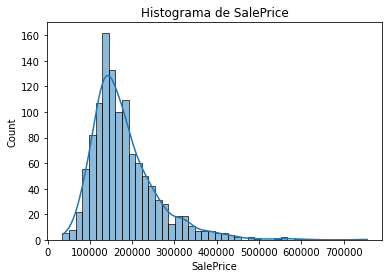

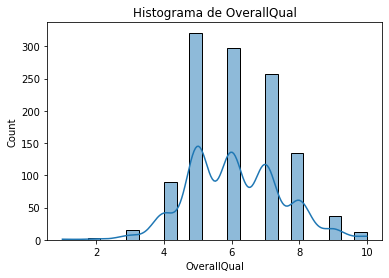

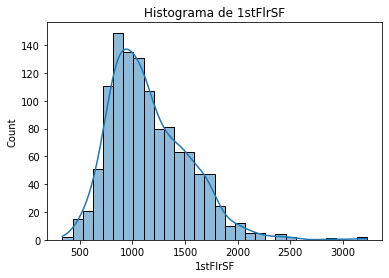

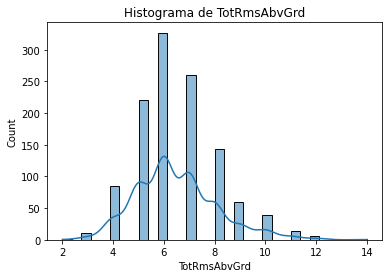

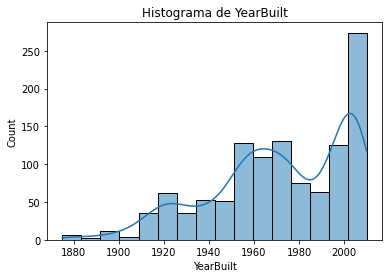

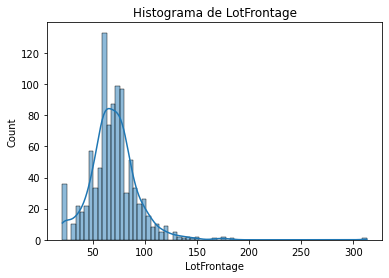

In [5]:
for x in df_training.columns:
    plt.figure()
    sns.histplot(df_training[x],  kde=True).set_title("Histograma de "+ x)

In [6]:
corr_SalePrice_OverallQual = np.corrcoef(df_training['SalePrice'], df_training['OverallQual'])[0,1]
corr_SalePrice_OverallQual

0.7939900504626407

In [7]:
correlation = df_training.corr()
correlation

SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  \
SalePrice      1.000000     0.793990  0.616289      0.564707   0.534171   
OverallQual    0.793990     1.000000  0.469411      0.444293   0.567313   
1stFlrSF       0.616289     0.469411  1.000000      0.409318   0.292074   
TotRmsAbvGrd   0.564707     0.444293  0.409318      1.000000   0.122911   
YearBuilt      0.534171     0.567313  0.292074      0.122911   1.000000   
LotFrontage    0.363292     0.242420  0.417388      0.341005   0.121474   

              LotFrontage  
SalePrice        0.363292  
OverallQual      0.242420  
1stFlrSF         0.417388  
TotRmsAbvGrd     0.341005  
YearBuilt        0.121474  
LotFrontage      1.000000

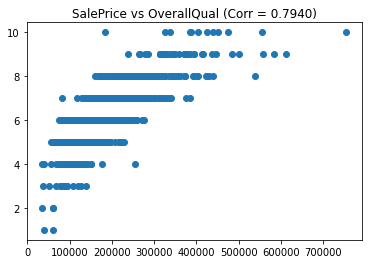

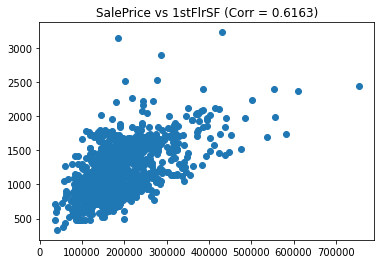

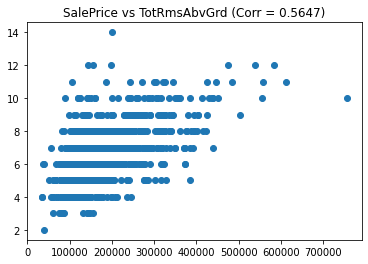

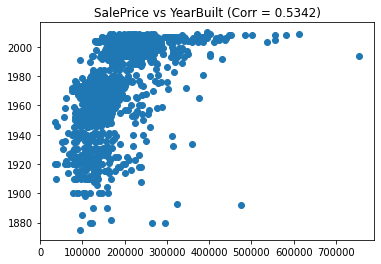

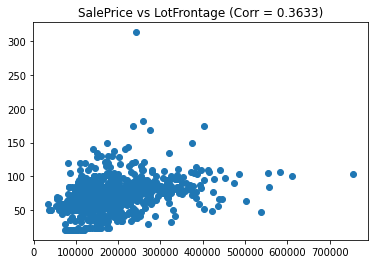

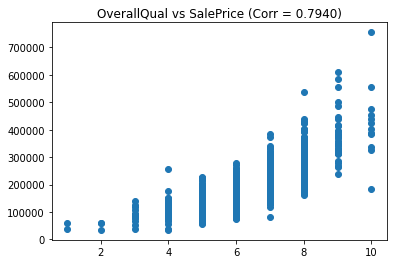

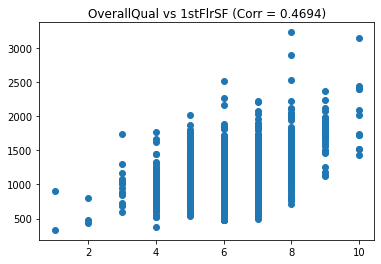

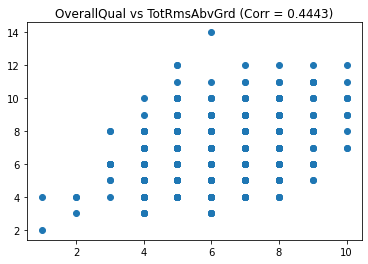

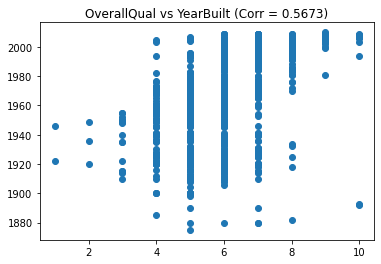

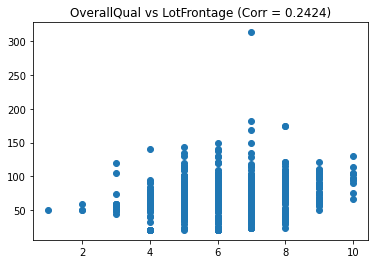

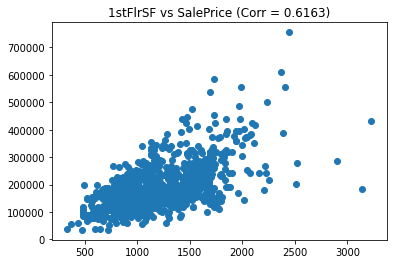

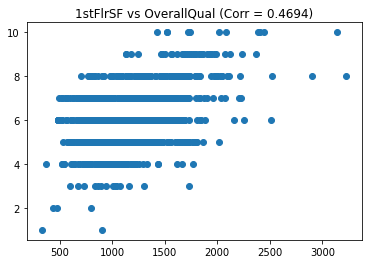

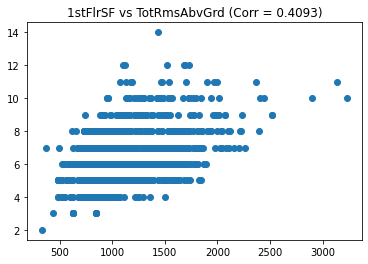

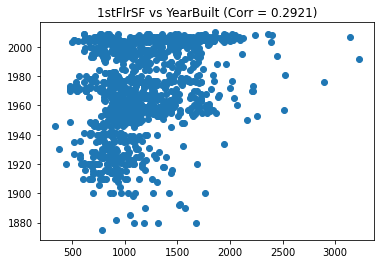

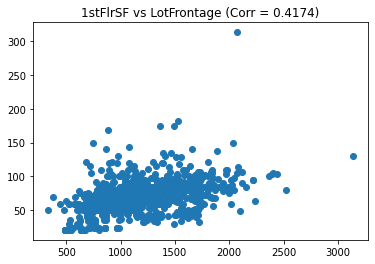

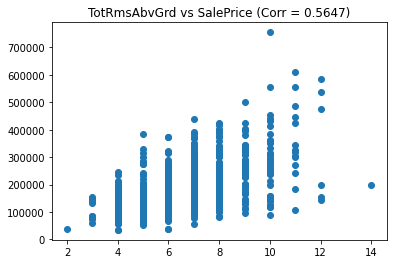

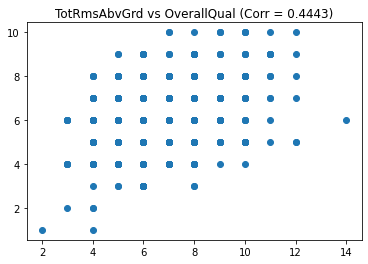

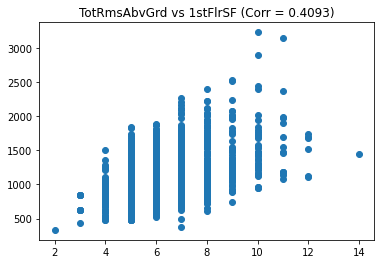

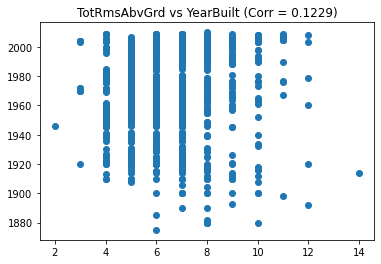

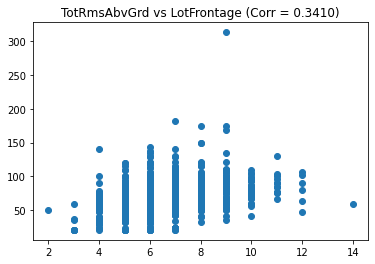

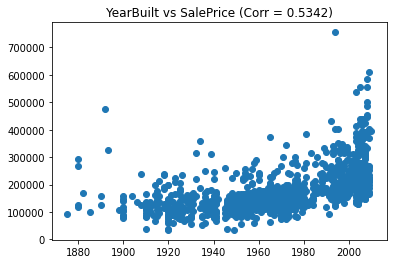

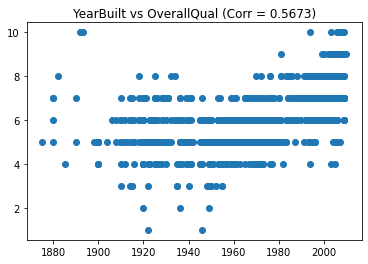

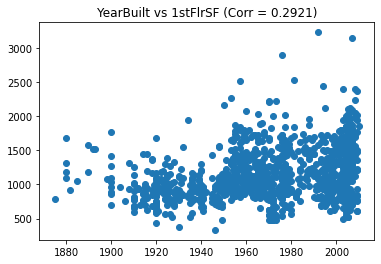

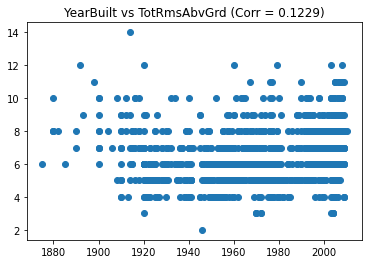

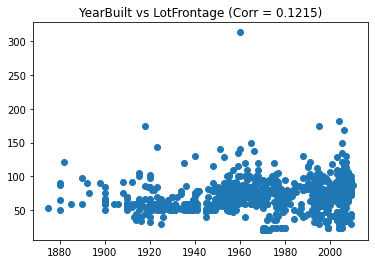

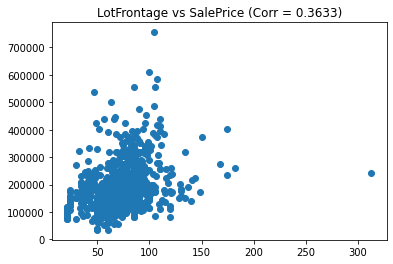

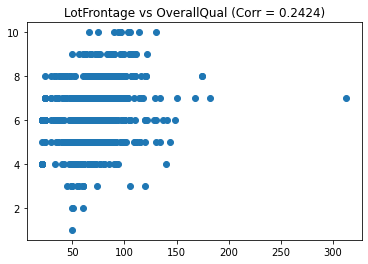

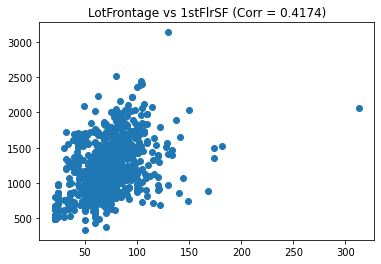

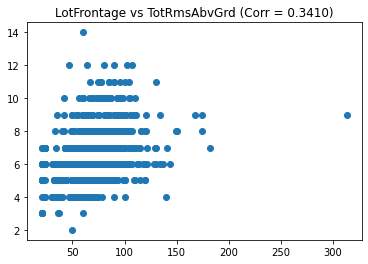

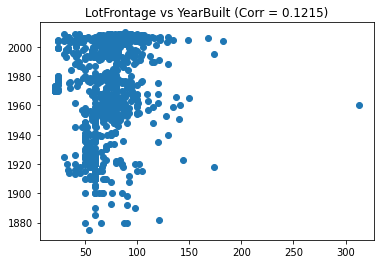

In [8]:
for x in df_training.columns:
    for y in df_training.columns:
        if x != y:
            plt.figure()
            plt.title("{} vs {} (Corr = {:.4f})".format(x,y,correlation[x][y]))
            plt.scatter(df_training[x], df_training[y])

In [185]:
def modelo(x, y, epochs, imprimir_error_cada, lr):
    # Valores iniciales de m y b
    mb = np.array([0,0])
    # Vector que almacenara los errores por cada epoch
    errores = np.array([])
    # Se crea la estructura de datos para almacenar los resultados de las iteraciones, se elige un diccionario
    # con la llave igual al numero de iteracion y el valor es el vector de m y b calculados
    iteraciones = dict()
    # Se realiza la matriz solicitada a partir de x y una columna de 1
    x_1 = np.column_stack((x,np.ones(len(x))))
    # Se realizan las iteraciones indicadas
    for i in range(epochs):
        # Se calcula y_hat
        y_hat = np.dot(x_1, mb)
        # Se calcula el error
        error = np.mean(np.power(y-y_hat, 2))*0.5
        # Se almacena el error en un vector
        errores = np.append(errores, error)
        # Se comprueba si corresponde imprimir el error basado en el numero de iteracion
        if (i+1)%imprimir_error_cada == 0:
            print(error)
        # Se crea un vector llamado y_1 con el valor igual a la diferencia entre y_hat y y
        y_1 = y_hat-y
        # Se calcula los gradientes
        gradientes = np.mean(x_1 * y_1.reshape(len(y_1),1), axis=0)
        # Se actualizan los parametros m y b
        mb = mb - (lr*gradientes)
        # Se almacenan los datos obtenidos de la iteracion
        iteraciones[i+1] = mb
    # Se retorna los valores de las iteraciones en un diccionario y los valores de los errores en un vector
    return iteraciones, errores

In [186]:
# modelo(df_training['OverallQual'], df_training['SalePrice'],1,1,1)
x = np.array([65,80,68])
y = np.array([208.5,181.5,223.5])
epochs = 10
imprimir = 10
lr = 0.0001
data, errores = modelo(x,y,epochs,imprimir,lr)

597.0218999895303


In [196]:
def cambio_error(errores):
    fig, ax = plt.subplots()
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel("Error")
    ax.set_title("Cambio del error en el tiempo")
    ax.plot(np.arange(1,len(errores)+1),errores, label="Errores calculados")
    ax.legend()

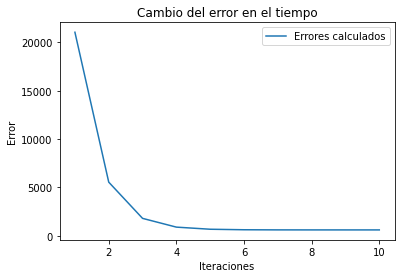

In [197]:
cambio_error(errores)